In [70]:
!pip install pandas_datareader

/opt/conda/lib/python3.10/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


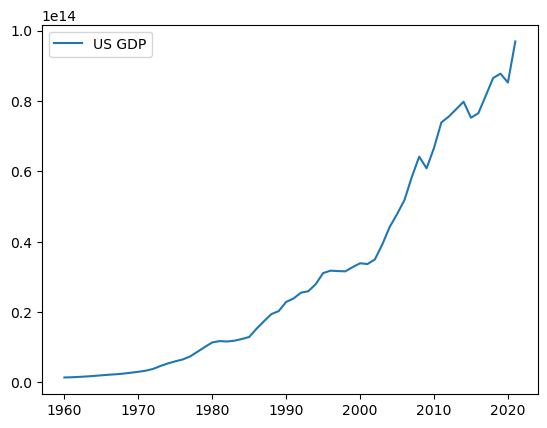

In [71]:
#Dowloading the data 
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress,norm,cauchy,t

np.random.seed(50) 

gdp_data = wb. download(indicator='NY.GDP.MKTP.CD' , country='WLD',start='1960' , end='2021')
time = np.arange(1960 ,2022)
gdp = gdp_data.iloc[:,0].astype(float) . to_numpy ()
# Data is returned in inverse chronological order , so reverse order
gdp = np.flip(gdp)
# Plot world GDP data against time
plt.plot(time , gdp , label='US GDP')
plt.legend()
plt.show()


**Question(a)** If the growth rate was a constant r, then the world’s GDP would grow as\\[ GDP_k = GDP_0(1 + r)^k \\]where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not
a linear relationship between time (k, in years) and GDP. However, we can get a linear relationship
by applying a simple transformation f(−) on both side of the equation. What is this transformation?
(Hint: we used this transformation in the context of MLE, it turns products into s

The transformation is as follows:
Starting with the equation \(GDP_k = GDP_0 \times (1+r)^k\), apply the natural logarithm transformation to both sides:

\\[\\ln(GDP_k) = \\ln(GDP_0 \\times (1+r)^k)\\]

Using logarithm properties, this can be further simplified:

\\[\ln(GDP_k) = \\ln(GDP_0) + k \\times \\ln(1+r)\\]

This transformation creates a linear relationship between the natural logarithm of GDP (\\(\\ln(GDP_k)\\)) and the number of years since 1960 (\\(k\\)).

In [72]:
# Transform the data with the natural logarithm
log_gdp = np.log(gdp)

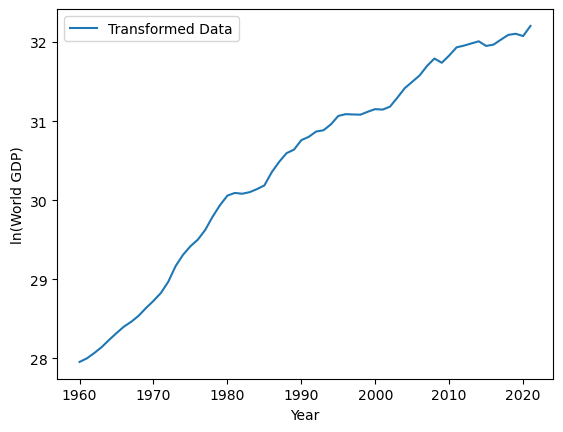

In [73]:
# Plot the transformed data and regression line
plt.plot(time, log_gdp, label='Transformed Data')
plt.xlabel('Year')
plt.ylabel('ln(World GDP)')
plt.legend()
plt.show()

**Question 1 (b)** Apply this transformation f(−) to the GDP data, and perform a regression against the time variable.
On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and
your R2 va



e
**Answer*Performed **Linear regression between time and the logarithm of GDP**, computed the R² value for this regression, and finally, plot the transformed data points along with the regression line. The **R²** value (R² Value :  0.9656784695439928 )is displayed on the plot to demonstrate **Linear Transformation of GDP's**w.

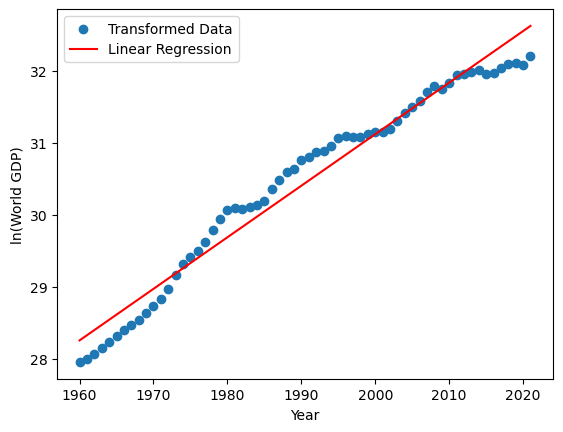

R-squared value = 0.9656784695439933


In [74]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(time, log_gdp)
regression_line = intercept + slope * time

# Plot the transformed data and regression line
plt.scatter(time, log_gdp, label='Transformed Data')
plt.plot(time, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('ln(World GDP)')
plt.legend()
plt.show()

# Display R-squared value
print(f'R-squared value = {r_value**2}')

**Question 1 (c)** Compute the residuals of your regression (i.e. the difference between the model and the observations),
and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we
can reject the null hypothesis that the residuals are sampled from a normal distribution with mean
0 and standard deviation σˆ. Take α = 99%.

**Answer** To compute the residuals of a regression, I performed a **linear regression** between your **dependent(GDP) and independent variables(time)** to get **linear regression model** and hence i was able to calculate residuals by subtracting the predicted values from the actual observations and Compute **Mean and Standard Deviation of Residuals** and perform **KS-Test** to check if the residuals follow a **normal distribution** after comparing the p-value with our alpha value we can say that residuals **may follow the normal distribution**


In [75]:
from scipy.stats import kstest

# Compute residuals
residuals = log_gdp - regression_line

# Print mean and standard deviation of residuals
print(f'Mean of residuals: {np.mean(residuals)}')
print(f'Standard deviation of residuals: {np.std(residuals)}')

# Perform KS-test
ks_statistic, ks_p_value = kstest(residuals, 'norm',(np.mean(residuals),np.std(residuals)))
print(f'KS-statistic: {ks_statistic}')
print(f'KS p-value: {ks_p_value}')

alpha = 0.01 #define confidence value

if ks_p_value < alpha/2:
    print("Reject the null hypothesis: Residuals do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Residuals may follow a normal distribution.")

Mean of residuals: 7.449238358775244e-15
Standard deviation of residuals: 0.24144627148321077
KS-statistic: 0.13053964663293832
KS p-value: 0.22115691558068906
Fail to reject the null hypothesis: Residuals may follow a normal distribution.


**Question 1 (d)** You will now apply the inverse of the transformation f(−) to your linear model in order to get a
non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot
of the (original) data poin

t**Answer** In order to obtain a non-linear model for GDP, we'll apply the inverse of the transformation used earlier to the linear model. This inverse transformation is the **exponential function**, denoted as **\\( e^x \\).**

After applying the inverse transformation, we'll showcase both the non-linear model and a scatter plot of the original data points on the same plot.
s.

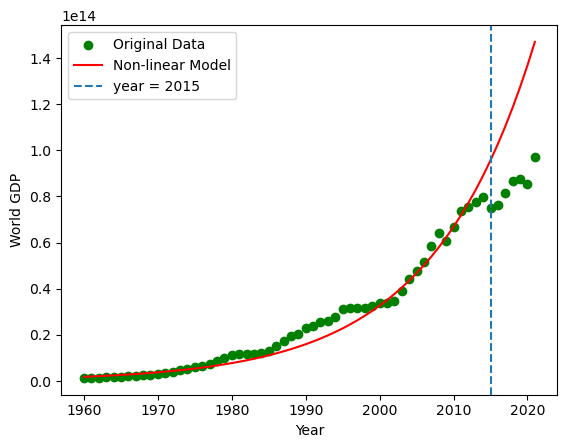

In [76]:
# Apply inverse transformation to get the non-linear model
non_linear_model = np.exp(intercept) * np.exp(slope * time)

# Plot the non-linear model and scatter-plot of original data points
plt.scatter(time, gdp, color='green',label='Original Data')
plt.plot(time, non_linear_model, color='red', label='Non-linear Model')
plt.axvline(2015, linestyle = '--',label='year = 2015')
plt.xlabel('Year')
plt.ylabel('World GDP')
plt.legend()
plt.show()


**Question 1 (e)** What is the relationship between the slope of the regression and the long-term growth rate of the
world GDP? Compute the long-term growth rate of the world GDP

**Answer** The long-term growth rate of world GDP is estimated to be approximately **7.42%** annually. Notably, there is a **linear relationship between the slope of the regression and the long-term growth rate** of the world GDP which means that slope of regression and growth rate are directly propotional


In [77]:
long_term_growth_rate = (np.exp(slope) - 1) * 100
print(long_term_growth_rate)

7.418942390303673


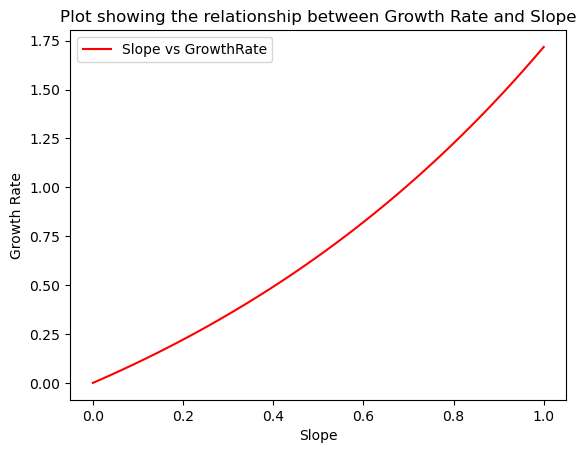

In [78]:
slope_ex = np.linspace(0,1,62) # generating 62 random slopes between 0-1
growth_rate_ex = (np.exp(slope_ex) - 1)
plt.plot(slope_ex,growth_rate_ex, color='red', label='Slope vs GrowthRate')
plt.title('Plot showing the relationship between Growth Rate and Slope')
plt.xlabel('Slope')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

**Question 1(f)** What do you observe since approximately 2015?

**Answer** 2015 data is following **upward trend** which having a **non-linear** relationship between GDP data and non-linear model

**Question 2 (a)** (a) Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi), where yi
is given by (1)

**Answer** In the code below I have generated the 10000 sets of error vector and calculate the value of y using the model \\[ y_i = \\{1}/{2} *\\ x_i + 2 + \\epsilon_i \\]

where \\( \\epsilon_i \\) follows a normal distribution with mean \\( 0 \\) and standard deviation \\( \\{1}/{5} \\). This is applied for ( 1 < i < 200 ), and the \\( x \\) values are generated using the NumPy linspace function within the range \\([-5, 5]\\) with 200 points.

In [79]:
# Parameters
a = 1/2
b = 2
epsilon_mean = 0
epsilon_std = 1/5
N = 200
num_simulations = 10000

# Generate x values
x = np.linspace(-5, 5, 200)

# Perform simulations and collect slopes and intercepts
slopes = []
intercepts = []
epcis = [] 
epcis_std = (1/5)** (1/2)

for _ in range(num_simulations):
    # Generate error vectors
    errors = np.random.normal(epsilon_mean, np.sqrt(epsilon_std), N)

    # Generate y values using the model (1)
    y = a * x + b + errors

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)

    # Store slope and intercept
    slopes.append(slope)
    intercepts.append(intercept)
    epcis.append(errors)

**Question 2 (b)** Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms
against their respective theoretical densities given in the lecture. What do you observe?

**Answer** comparing **histograms of slopes and intercepts from 10,000 linear regressions** to their respective theoretical densities based on the given error vector statistics.
the simulated values of intercepts and slopes with respect to theoretical pdf of normal distribution using the formulas provided in the lectures, we can see that the model provided follows the **normal error theorem**. The formulae I am using for slope and intercept are as follows
are as follows

for slopes **(sigma^2) / (sum_{i}\(x_i - bar{x})^2)**

for intercepts **(sigma^2) (sum_{i}(x_i) / n (sum_{i}(x_i - bar{x})^2)**]
\]


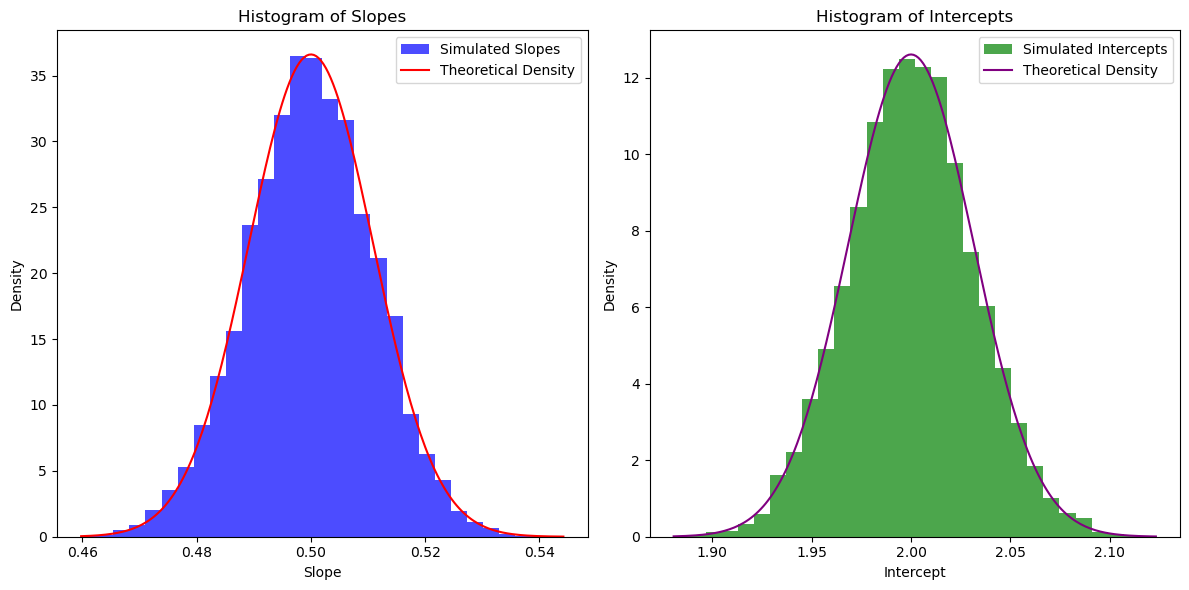

In [80]:
# Plot histograms and theoretical densities
plt.figure(figsize=(12, 6))

# Plot histogram of slopes
plt.subplot(1, 2, 1)
plt.hist(slopes, bins=30, density=True, alpha=0.7, color='blue', label='Simulated Slopes')
x_values_slope = np.linspace(min(slopes), max(slopes), 200)
plt.plot(x_values_slope, norm.pdf(x_values_slope, loc=a, scale= np.sqrt(epsilon_std /np.sum(np.square(x - np.mean(x))))), color='red', label='Theoretical Density')
plt.title('Histogram of Slopes')
plt.xlabel('Slope')
plt.ylabel('Density')
plt.legend()

# Plot histogram of intercepts
plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=30, density=True, alpha=0.7, color='green', label='Simulated Intercepts')
x_values_intercept = np.linspace(min(intercepts), max(intercepts), 200)

x_squares = np.square(x)
num = epsilon_std*np.sum(x_squares)
x_den = x-np.mean(x)
x_den_square = np.square(x_den)
den = (N*(np.sum(x_den_square)))
eq = num/den
fin_eq = np.sqrt(eq)

# plt.plot(x_values_intercept, norm.pdf(x_values_intercept, loc=b, scale= fin_eq ), color='purple', label='Theoretical Density')
plt.plot(x_values_intercept, norm.pdf(x_values_intercept, loc=b, scale= np.sqrt((epsilon_std*(np.sum(np.square(x)))))/np.sqrt(N*(np.sum(np.square(x-np.mean(x)))))), color='purple', label='Theoretical Density')
plt.title('Histogram of Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Density') 
plt.legend()

plt.tight_layout()
plt.show()

**Question 2 (c)** For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given
in the lecture) and plot their histograms against their theoretical density (also given in the lecture).
What do you observe?

**Answer** In the below code I have calculated the test statistic values for slopes and intercept for above model and plotted them against their theoretical densities as provided in lecture I am calculating the theoretical densities of **t-distribution** according to following formulas, from the graph we can conclude that our model satisfies **normal error theorem**

for Intercepts :- **$=\frac{(\hat{\beta}_0-\beta_0) \sqrt{n(n-2) \sum_i\left(x_i-\bar{x}\right)^2}}{\sqrt{\sum_i\left(y_i-\beta_0-\beta_1 x_i\right)^2 \sum_i x_i^2}} \sim \frac{N(0,1)}{{\sqrt{\frac{\chi^2(n-2)}{(n-2)}}}^2}=t(n-2)$**

for slopes :- **$=\frac{\hat{\beta}_1-\beta_1}{\sqrt{\frac{\sum_i\left(y_i-\beta_0-\beta_1 x_i\right)^2}{(n-2) \sum_i\left(x_i-\bar{x}\right)^2}}} \sim$ $\frac{N(0,1)}{\sqrt{\frac{\chi^2(n-2)}{(n-2)}}}=t(n-2)$**

In [81]:
slope_test_statistics = []
intercept_test_statistics = []
num_simulations = 10000
error_vector_std = 0.2
error_vector_mean = 0
N = 200
x = np.linspace(-5, 5, N)
 
 
# Initialize arrays to store test statistics for slope and intercept
slope_test_statistics = np.zeros(10000)
intercept_test_statistics = np.zeros(10000)
 
for i in range(10000):
    # Generate error vectors
    error_vector = np.random.normal(error_vector_mean, error_vector_std, N)
    # Generate y values using the model (1)
    y = a * x + b + error_vector
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

 
    # Calculate test statistics for slope and intercept
    slope_test_statistics[i] = (slope-a) / std_err  # Test statistic for slope
    #intercept_test_statistics.append((intercept-b) / (std_err / np.sqrt(np.sum((x - np.mean(x))**2))))  # Test statistic for intercept
 
    sum_diff_mean  = np.sum((x-np.mean(x))**2)
    intercept_num_sec = np.sqrt( N * (N-2) * sum_diff_mean )
    denominator_intercept_function = np.sqrt( np.sum(epcis[i]**2 )* np.sum(x**2) )
    intercept_test_statistics[i] = (intercepts[i] - b) * intercept_num_sec / denominator_intercept_function

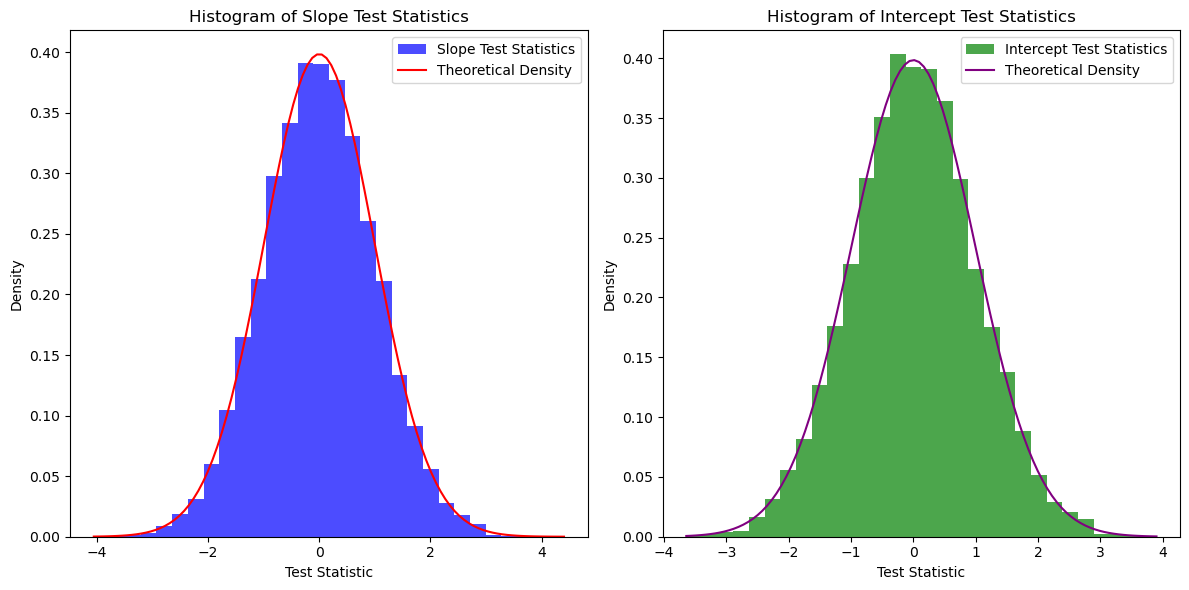

In [82]:
DF = N-2

# Plot histograms and theoretical densities for test statistics
plt.figure(figsize=(12, 6))

# Plot histogram of slope test statistics
plt.subplot(1, 2, 1)
plt.hist(slope_test_statistics, bins=30, density=True, alpha=0.7, color='blue', label='Slope Test Statistics')
x_values = np.linspace(min(slope_test_statistics), max(slope_test_statistics), 100)
plt.plot(x_values, t.pdf(x_values, loc=0, scale=1,df=DF), color='red', label='Theoretical Density')
plt.title('Histogram of Slope Test Statistics')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend()

# Plot histogram of intercept test statistics
plt.subplot(1, 2, 2)
plt.hist(intercept_test_statistics, bins=30, density=True, alpha=0.7, color='green', label='Intercept Test Statistics')
x_values = np.linspace(min(intercept_test_statistics), max(intercept_test_statistics), 100)
plt.plot(x_values, t.pdf(x_values, loc=0, scale=1,df=DF), color='purple', label='Theoretical Density')
plt.title('Histogram of Intercept Test Statistics')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

**Question 2(d)** Take the last of your regressions and perform the following two tests with α = 99% (you may use
either p-values or critical regions but make sure you think about whether this is a one-sided o
two-sided test).
First test: H0 :  /2 1
2
(assuming b = 2)
Second test: H0 : b = 2 (assumn/  =
1
2
)

**Answer:** The code provided calculates the last values of regressions and determines the critical regions for both slope and intercept using **t-distributions**. The resulting graphs clearly show that both the last calculated values lie **outside the critical regions**. Therefore, based on the observed results, **we fail to reject null hypothesis.**

In [83]:
# Given significance level
Df = N-2
alpha = 0.01 # 99% confidence
x = np.linspace(-5,5,200)
critical_region_1 = t.ppf(alpha/2, Df)
critical_region_2 = - critical_region_1
 
sum_diff_mean = np.sum((x - np.mean(x))**2)
denominator_slope_test = np.sqrt(np.sum(epcis[-1]**2) / (Df * sum_diff_mean))
slope_test_statistics = (slopes[-1] - a) / denominator_slope_test
 
intercept_num_test = np.sqrt( N * (N-2) * sum_diff_mean )
denominator_intercept_test = np.sqrt( np.sum(epcis[-1]**2 ) * np.sum(x**2 ))
intercept_test_statistics = (intercepts[-1] - b) * intercept_num_test / denominator_intercept_test
 
print('Critical regin between  {} and {}'.format(critical_region_1, critical_region_2))
print('t-stat value for the slope is {}'.format(slope_test_statistics))
print('t-stat value for the intercept is {}'.format(intercept_test_statistics))

Critical regin between  -2.600887277962623 and 2.600887277962623
t-stat value for the slope is -0.28783317585398704
t-stat value for the intercept is -0.6103303408782348


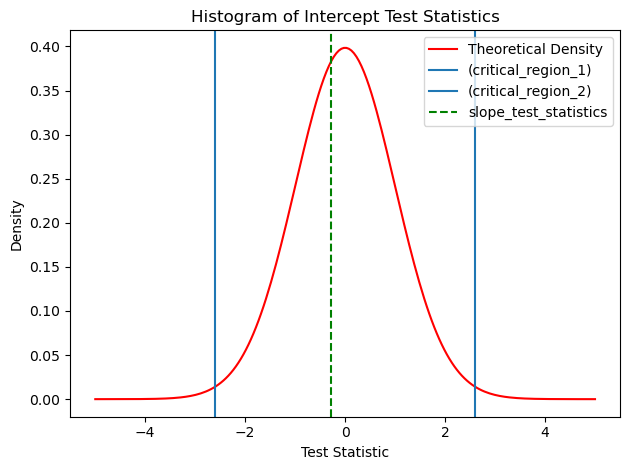

In [88]:
plt.plot(x, t.pdf(x,N-2), color='red', label='Theoretical Density')
plt.title('Histogram of Intercept Test Statistics')
plt.xlabel('Test Statistic')
plt.axvline(critical_region_1,label='(critical_region_1)')
plt.axvline(-critical_region_1,label='(critical_region_2)')
plt.axvline(slope_test_statistics,color = 'green', linestyle='--',label = 'slope_test_statistics')
plt.ylabel('Density')
plt.legend()
# plt.fill_between(critical_region, color='gray', alpha=0.5, label='Shaded Area')
plt.tight_layout()
plt.show()


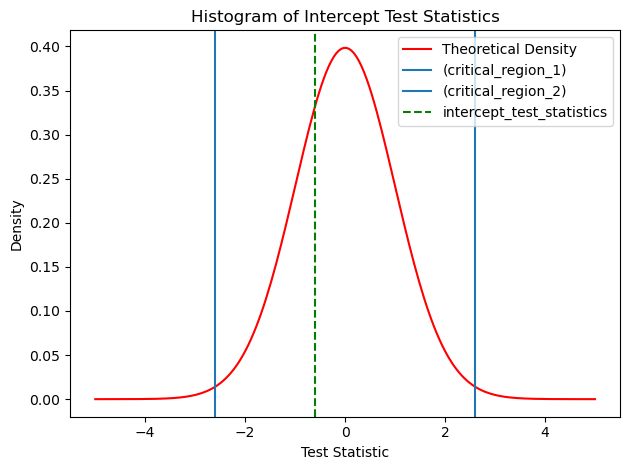

In [89]:
plt.plot(x, t.pdf(x,N-2), color='red', label='Theoretical Density')
plt.title('Histogram of Intercept Test Statistics')
plt.xlabel('Test Statistic')
plt.axvline(critical_region_1,label='(critical_region_1)')
plt.axvline(-critical_region_1,label='(critical_region_2)')
plt.axvline(intercept_test_statistics,color = 'green', linestyle='--',label = 'intercept_test_statistics')
plt.ylabel('Density')
plt.legend()
# plt.fill_between(critical_region, color='gray', alpha=0.5, label='Shaded Area')
plt.tight_layout()
plt.show()

**Question 2(e)**  ≤ N (2)
Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these
regressions as well as the associated statistics. Plot their histograms. What do you observe?

**Answer** In the code below I am redefining the model with respect to the cauchy's distribution and calculated 10000 test statistic values for slope and intercept and plotted them. from the graph plotted it is clear that the histograms plotted for test statistics of slopes and intercepts **the t-distribution cant accomodate the histograms** hence we can say that the test statistics values calculated are not **correct with respect to our redefined model** i.e. they are not close to our approximation of **true values**

In [86]:
# Set parameters
N = 200
a = 0.2
b = 2
x = np.linspace(-5, 5, 200)
 
slopes_cauchy = np.zeros(10000)
intercepts_cauchy = np.zeros(10000)
slope_test_statistics_cauchy = np.zeros(10000)
intercept_test_statistics_cauchy = np.zeros(10000)
 
# Perform 10,000 linear regressions
for i in range(10000):
    # Generate error vector epsilon from Cauchy distribution
    epsilon_cauchy = np.random.standard_cauchy(200) * 0.2
    # Generate y values using the linear equation y = ax + b + epsilon
    y_cauchy = a * x + b + epsilon_cauchy
    # Fit linear regression model
    slope_cauchy, intercept_cauchy, _, _, std_err_cauchy = linregress(x, y_cauchy)
    # Store slope and intercept values
    slopes_cauchy[i] = slope_cauchy
    intercepts_cauchy[i] = intercept_cauchy
    # Calculate t-statistics for slope and intercept
    t_stat_slope_cauchy = slope_cauchy / std_err_cauchy
    t_stat_intercept_cauchy = intercept_cauchy / (std_err_cauchy / np.sqrt(np.sum((x - np.mean(x))**2)))

    # Store t-statistics
    df = 200-2
    sum_diff_mean = np.sum((x - np.mean(x))**2)
    denominator_slope = np.sqrt(np.sum(epsilon_cauchy**2) / ( df * sum_diff_mean))
    slope_test_statistics_cauchy[i] = (slope_cauchy - a) / denominator_slope
    sum_diff_mean  = np.sum((x-np.mean(x))**2)
    intercept_num = np.sqrt( 200 * (200-2) * sum_diff_mean )
    denominator_intercept = np.sqrt( np.sum(epsilon_cauchy**2 )* np.sum(x**2) )
    intercept_test_statistics_cauchy[i] = (intercept_cauchy - b) * intercept_num / denominator_intercept

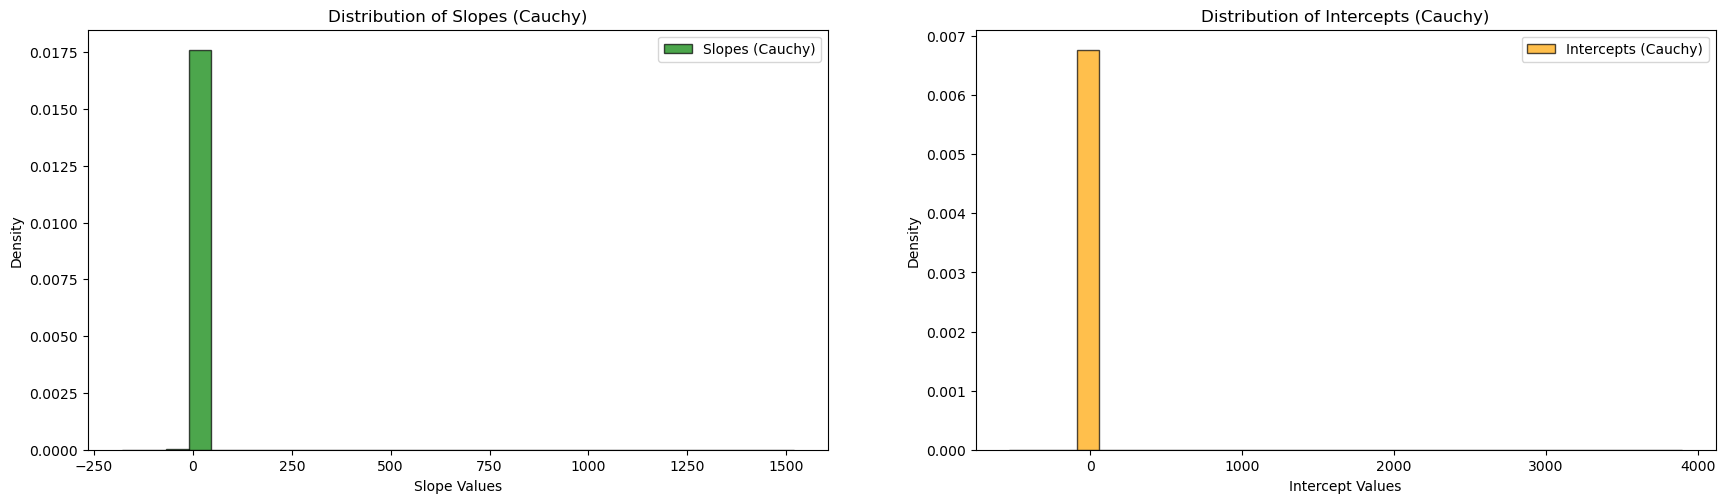

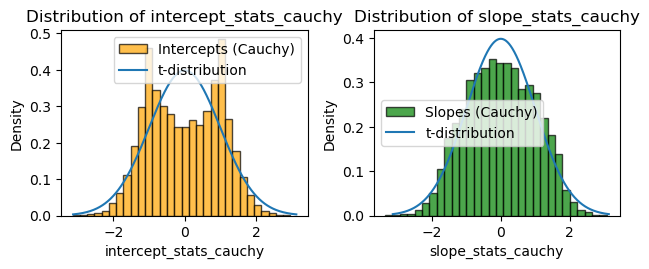

In [87]:
x_c = np.linspace(t.ppf(0.001, df), t.ppf(0.999, Df), 1000)

# Plot histograms of slopes, intercepts, and associated statistics
plt.figure(figsize=(21, 12))
 
# Plot histogram for slopes
plt.subplot(2, 2, 1)
plt.hist(slopes_cauchy, bins=30, density=True, alpha=0.7, edgecolor='black', label='Slopes (Cauchy)',color = 'green')
plt.title('Distribution of Slopes (Cauchy)')
plt.xlabel('Slope Values')
plt.ylabel('Density')
plt.legend()
 
# Plot histogram for intercepts
plt.subplot(2, 2, 2)
plt.hist(intercepts_cauchy, bins=30, density=True, alpha=0.7, edgecolor='black', label='Intercepts (Cauchy)',color = 'orange')
plt.title('Distribution of Intercepts (Cauchy)')
plt.xlabel('Intercept Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot histogram for intercepts
plt.subplot(2,2,3)
plt.hist(intercept_test_statistics_cauchy, bins=30, density=True, alpha=0.7, edgecolor='black', label='Intercepts (Cauchy)', color = 'orange')
plt.plot(x_c,t.pdf(x_c,Df),label = 't-distribution')
plt.title('Distribution of intercept_stats_cauchy')
plt.xlabel('intercept_stats_cauchy')
plt.ylabel('Density')
plt.legend()
 
 
# Plot histogram for intercepts
plt.subplot(2,2,4)
plt.hist(slope_test_statistics_cauchy, bins=30, density=True, alpha=0.7, edgecolor='black', label='Slopes (Cauchy)',color = 'green')
plt.plot(x_c,t.pdf(x_c,Df),label = 't-distribution')
plt.title('Distribution of slope_stats_cauchy')
plt.xlabel('slope_stats_cauchy')
plt.ylabel('Density')
plt.legend()
 
 
plt.tight_layout()
plt.show()